<a href="https://colab.research.google.com/github/tqnhu2407/Image_Processing/blob/master/img_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Đồ án 2: Image Processing


## Thông tin cá nhân

### Họ tên: Trần Quỳnh Như

### MSSV: 18127266

## Các chức năng đã hoàn thành: 6/6

1. Thay đổi độ sáng cho ảnh

2. Thay đổi độ tương phản cho ảnh

3. Chuyển đổi ảnh RGB thành ảnh xám

4. Lật ảnh (ngang - dọc)

5. Chồng 2 ảnh cùng kích thước (ảnh xám)

6. Làm mờ ảnh

## Ý tưởng thực hiện

Tạo các hàm ứng với từng yêu cầu.

Mỗi hàm sẽ return ra ảnh (1 hoặc 2 chiều) sau khi được xử lí.

Cuối cùng gọi hàm hiển thị ảnh vừa xử lí.

### Lưu ý:

Đối với các yêu cầu 1, 2, 3, 4, 6 em dùng chung 1 ảnh input.

Riêng yêu cầu 5 (chồng 2 ảnh) thì em dùng những ảnh khác.

## Mô tả các hàm chức năng và Hình ảnh kết quả

Import các thư viện cần thiết.

In [1]:
import PIL
import matplotlib.pyplot as plt
import numpy as np

Đọc ảnh.

Lưu ảnh thành numpy array 2 chiều và 1 chiều với kiểu dữ liệu np.uint16 (Để trong quá trình tính toán không lo giá trị màu vượt quá 255. Khi dùng plt.imshow() để hiển thị ảnh thì các giá trị sẽ được tự động
giới hạn lại thành [0...255]).

Hiển thị ảnh gốc.

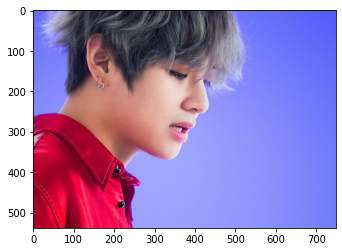

In [2]:
im = PIL.Image.open('v.jpg')
im_2D = np.array(im, dtype = np.uint16)
height, width = im_2D.shape[0], im_2D.shape[1]
im_1D = np.reshape(im_2D, (width*height, 3))

plt.imshow(im_2D)

### 1. Thay đổi độ sáng cho ảnh

Tham số truyền vào là numpy array 1 chiều.

Ta chỉ việc lấy mảng đó cộng với hằng số để tăng độ trắng cho ảnh => Ảnh được tăng độ sáng.

In [3]:
def change_brightness(im_1D):

    return im_1D + 40

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


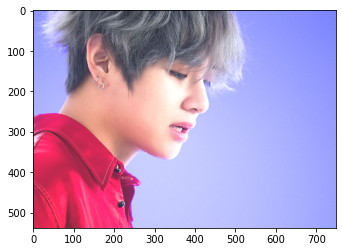

In [4]:
result_1D = change_brightness(im_1D)
result_2D = np.reshape(result_1D, (height, width, 3)) # np.uint16

plt.imshow(np.array(result_2D))

### 2. Thay đổi độ tương phản cho ảnh

Tham số truyền vào là numpy array 1 chiều.

Ta lấy mảng đó nhân với một hằng số, sau đó trả về numpy array với kiểu dữ liệu np.uint16 để ép kiểu số nguyên và để tránh giá trị màu vượt quá 255.

In [5]:
def change_contrast(im_1D):

    return np.array(im_1D * 1.4, dtype=np.uint16)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


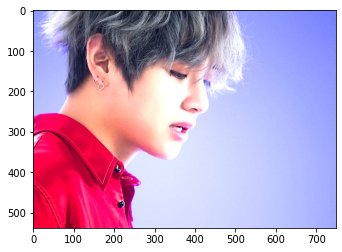

In [6]:
result_1D = change_contrast(im_1D)
result_2D = np.reshape(result_1D, (height, width, 3)) # np.uint16

plt.imshow(np.array(result_2D))

### 3. Chuyển đổi ảnh RGB thành ảnh xám

Tham số truyền vào là numpy array 2 chiều.

Ta áp dụng Weighted method hay Luminosity method để biến ảnh có 3 kênh màu RGB thành ảnh có 1 kênh màu, với mỗi màu được tính theo công thức:

### New grayscale image = 0.3 * R + 0.59 * G + 0.11 * B

Ta gọi hàm np.dot như bên dưới để thực hiện nhân lần lượt các kênh màu của từng điểm ảnh với các giá trị 0.3, 0.59 và 0.11 rồi cộng lại để ra được màu xám tương ứng.

Cuối cùng ta hiển thị ảnh với cmap='gray'.

In [7]:
def gray(im_2D):

    return np.dot(im_2D[...,:3], [0.3, 0.59, 0.11])

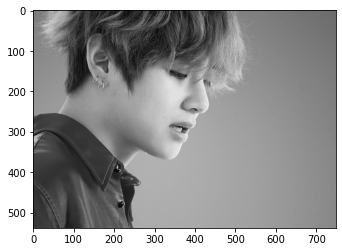

In [8]:
result_2D = gray(im_2D)
result_2D = np.array(result_2D, dtype=int)

plt.imshow(result_2D, cmap='gray')

### 4. Lật ảnh (ngang)

Tham số truyền vào là numpy array 2 chiều.

Ta tạo 1 bản copy của ảnh ban đầu và reverse từng dòng điểm ảnh lại.

In [9]:
def flip_horizontal(im_2D):

    result_2D = im_2D.copy()

    for row in range(im_2D.shape[0]):
        result_2D[row] = result_2D[row][::-1]

    return result_2D

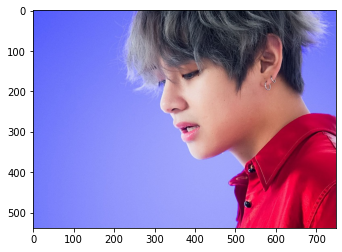

In [10]:
result_2D = flip_horizontal(im_2D)
plt.imshow(result_2D)

### 4. Lật ảnh (dọc)

Tham số truyền vào là numpy array 2 chiều.

Ta tạo 1 bản copy của ảnh ban đầu và reverse từng cột điểm ảnh lại.

In [11]:
def flip_vertical(im_2D):

    return im_2D[::-1]

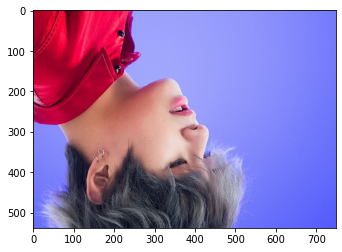

In [12]:
result_2D = flip_vertical(im_2D)
plt.imshow(result_2D)

### 5. Chồng 2 ảnh cùng kích thước

Tham số truyền vào là 2 numpy array 2 chiều (với kiểu dữ liệu np.uint16) và kích thước của chúng.

Ta chồng 2 ảnh bằng cách thực hiện cộng 2 numpy array lại rồi nhân với 0.5 (tính trung bình cộng 2 bức ảnh ban đầu).

Cuối cùng ta trả về hàm gray cho bức ảnh vừa tính được.


In [13]:
def combine(im1_2D, im2_2D):

    # Calculate average of the 2 images
    result_2D = np.array(im1_2D + im2_2D, dtype=np.uint16)
    result_2D = np.array(result_2D * 0.5, dtype=np.uint16)

    # return the gray image
    return gray(result_2D)

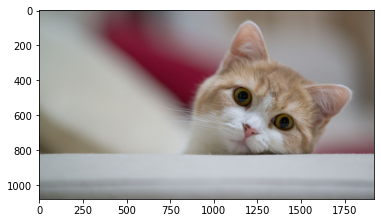

In [14]:
im1 = PIL.Image.open('Cat.jpg')
im1_2D = np.array(im1, dtype=np.uint16)
plt.imshow(im1_2D)

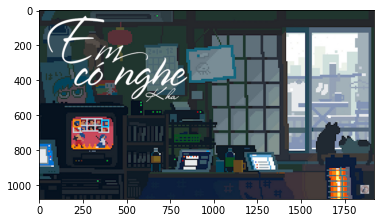

In [15]:
im2 = PIL.Image.open('Em co nghe - Kha.png')
im2_2D = np.array(im2, dtype=np.uint16)
plt.imshow(im2_2D)

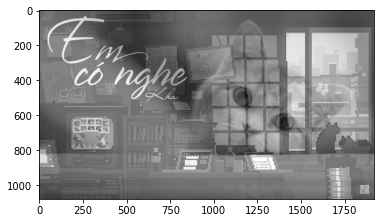

In [16]:
result_2D = combine(im1_2D, im2_2D)
result_2D = np.array(result_2D, dtype=int)

plt.imshow(result_2D, cmap='gray')

### Hạn chế khi chồng ảnh:

Khi áp dụng cho ảnh nền đỏ và sao vàng thì kết quả lại không như mong muốn.

Nhưng thuật toán lại cho kết quả tốt với những bức ảnh khác.

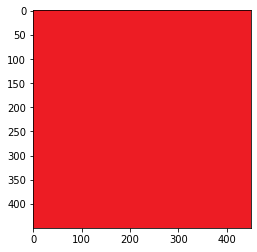

In [17]:
im1 = PIL.Image.open('red.png')
im1_2D = np.array(im1, dtype=np.uint16)
plt.imshow(im1_2D)

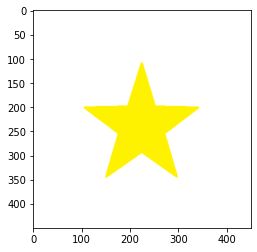

In [18]:
im2 = PIL.Image.open('yellow star.png')
im2_2D = np.array(im2, dtype=np.uint16)
plt.imshow(im2_2D)

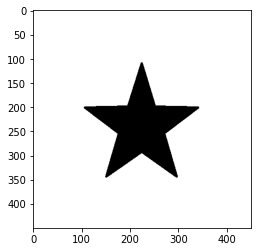

In [19]:
result_2D = combine(im1_2D, im2_2D)
result_2D = np.array(result_2D, dtype=int)

plt.imshow(result_2D, cmap='gray')

### 6. Làm mờ ảnh

Tham số truyền vào là numpy array 2 chiều.

Ta áp dụng thuật toán Box blur: Đối với từng điểm ảnh, giá trị màu của nó được tính bằng cách lấy trung bình cộng của (8 điểm ảnh xung quanh và chính nó)

Lưu ý: các điểm ảnh ở viền bức ảnh sẽ không tính được do không có đủ 8 điểm ảnh xung quanh. Do đó em bỏ qua các điểm ảnh ở viền bức ảnh vì nó không ảnh hưởng nhiều đến tổng quan bức ảnh.

Ngoài ra, em cho thuật toán lặp 4 lần (làm mờ ảnh 4 lần) để ta có thể nhận thấy kết quả rõ ràng hơn. Tuy nhiên nếu ảnh có kích thước lớn hơn thì ta cần tăng số lượng vòng lặp lên.

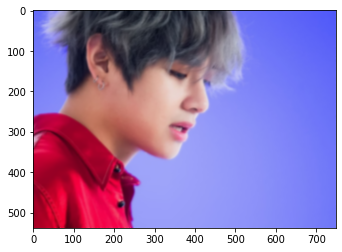

In [20]:
def blur(im_2D):

    result_2D = im_2D.tolist()
    height, width = im_2D.shape[0], im_2D.shape[1]
    
    for blur_iter in range(4): # the more loops we have, the blurrier the image

        pix = result_2D
        for x in range(1, height - 1):
            for y in range(1, width - 1):
                
                avg = [0, 0, 0]
                for pos_x in range(-1, 2):
                    for pos_y in range(-1, 2):
                        cell = pix[x + pos_x][y + pos_y]
                        avg[0] += cell[0]
                        avg[1] += cell[1]
                        avg[2] += cell[2]
                result_2D[x][y] = avg[0]//9, avg[1]//9, avg[2]//9
    
    return np.array(result_2D)

result_2D = blur(im_2D)
plt.imshow(result_2D)

# Tham khảo

Thay đổi độ sáng cho ảnh: 

https://www.geeksforgeeks.org/opencv-understanding-brightness-in-an-image/?ref=rp

Thay đổi độ tương phản cho ảnh: 

https://www.geeksforgeeks.org/opencv-understanding-contrast-in-an-image/?ref=rp

Chuyển đổi ảnh RGB thành ảnh xám: 

https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm (Trong file hướng dẫn đồ án)

Làm mờ ảnh:

https://en.wikipedia.org/wiki/Kernel_(image_processing) (Trong file hướng dẫn đồ án)

https://en.wikipedia.org/wiki/Box_blur

